# Exercise 1: Total Energies and Properties for Water

## Part 1: Compute total energies with MRChem

Below you will find links to all all the relevant pages of the MRChem documentation. Please refer to these if you need more details on how to set up the calculations.

[<img src="https://img.shields.io/badge/Documentation-Main_Page-orange.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/)
[<img src="https://img.shields.io/badge/I_Need_Help-Installation-teal.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/installation.html)
[<img src="https://img.shields.io/badge/I_Need_Help-How_To_Run-green.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/users/running.html)
[<img src="https://img.shields.io/badge/I_Need_Help-Input_Quick_Guide-blue.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/users/user_inp.html)
[<img src="https://img.shields.io/badge/I_Need_Help-Input_Reference-purple.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/users/user_ref.html)
[<img src="https://img.shields.io/badge/I_Need_Help-JSON_Output-red.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/users/program_json.html)

### Introduction
In this exercise you will use the MRChem code to perform simple energy optimizations of a water molecule, using different MultiWavelet precision levels.
We provide some GTO energies that can serve as a reference (computed with the `ORCA` code using aug-pc-1, aug-pc-2, aug-pc-3, aug-pc-4 basis sets).

The `MWn` notation is a shorthand for a MW precision of `1.0e-n`, and is commonly used to refer to calculations of different precisions (analogous to the DZ, TZ, QZ... notation for GTO basis sets).
______

In [1]:
# GTO energies with Jensen's aug-pc-n basis sets
gto = {
    'aug-dz': -76.337833062097,
    'aug-tz': -76.384930572433,
    'aug-qz': -76.388407845518,
    'aug-5z': -76.388593505849
}

### Interactive 3D viewer for the water molecule

In [2]:
import py3Dmol

view = py3Dmol.view(width=200, height=200)
view.addModel(open('geometries/water.xyz').read())
view.setStyle({'stick': {}})
view.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### How to call MRChem
Open a new Jupyter Lab terminal by from the Jupyter Launcher (blue button with white "+").
This works like any other linux terminal, and you can edit input files and look at output files here to complete the exercise.

MRChem with OpenMP parallelization should already be pre-installed from our conda distribution.
In order to start an MRChem calculation, you just call the input parser (`mrchem`) from the command line like this:

```bash
export OMP_NUM_THRADS=16
mrchem jobname.inp
```

This will parse the *user* input file (`jobname.inp`) and generate a *program* input file in JSON format (`jobname.json`), and then pass the program input to the binary MRChem executable and redirect `stdout` to the output file (`jobname.out`). The output is also stored in `jobname.json` in JSON format in a separate output section, and this file serves as a complete record of the calculation (including both the input and output). In the example above, MRChem will use 16 threads as defined in the `OMP_NUM_THREADS` environment variable. 
___________

### The MRChem input file
Below is an outline of an MRChem input for a simple energy optimization at the MW3 precision level.
Try to use the documentation pages to find the relevant keywords for setting up the calculation.
If you need additional help, don't hesitate to ask :)

```
world_prec = 1.0e-3
world_unit = angstrom

Molecule {
  $coords
  ...
  $end
}

WaveFunction {
}

SCF {
}

```
______

### Computational details
* The GTO results were computed with the PBE functional, and so you should also use PBE if the results are to comparable.
* An optimized geometry of water is supplied in `./geometries/water.xyz`.
* Use a KAIN SCF accelerator history of 5.
* Make sure the SCF `max_iter` option is large enough (20 should be plenty).
* As starting guess, `sad_dz` works well.

> **Note**
> Input blocks are case sensitive, while keywords inside blocks are not
_____

### Instructions
 1. Generate the input files necessary to fill in the missing data in the table above. You can either do this in your favorite command line text editor, or write Python scripts from within the notebook.
 
 2. Submit the calculations as described above.
 
 3. You are encouraged to take a look at the output file (`jobname.out`) to look at the information printed here, and also to check out the JSON output file (`jobname.json`) to see the same output in a very scripting friendly format.
 
 4. Extract the relevant information from either the `jobname.out` file or the `jobname.json` file, and fill out the table above.
 
 5. Using the MW5 data as a reference, compute the basis set errors for the other methods. Try to visualize these either as a table or by plotting the errors.
 _______

## Part 2: Compute NMR shielding constants with MRChem

Below you will find links to all all the relevant pages of the MRChem documentation. Please refer to these if you need more details on how to set up the calculations.

[<img src="https://img.shields.io/badge/Documentation-Main_Page-orange.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/)
[<img src="https://img.shields.io/badge/I_Need_Help-Installation-teal.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/installation.html)
[<img src="https://img.shields.io/badge/I_Need_Help-How_To_Run-green.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/users/running.html)
[<img src="https://img.shields.io/badge/I_Need_Help-Input_Quick_Guide-blue.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/users/user_inp.html)
[<img src="https://img.shields.io/badge/I_Need_Help-Input_Reference-purple.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/users/user_ref.html)
[<img src="https://img.shields.io/badge/I_Need_Help-JSON_Output-red.svg?logo=LOGO">](https://mrchem.readthedocs.io/en/latest/users/program_json.html)

### Introduction
In this exercise you will use the MRChem code to compute NMR shielding constants for a water molecule, using the linear response implementation.

You can store your results in the empty tables below. The GTO calclations have already been performed with the Dalton code, and can serve as a comparison.

The `MWn` notation is a shorthand for a relative precision of `1.0e-n`, and is commonly used to refer to calculations of different precisions (analogous to the DZ, TZ, QZ... notation for GTO basis sets).

<div align="center"> Table 1. NMR shielding constants for the Hydrogen atom.</div>

| H-atom   | Origin@H     | Origin@Cl     |
|----------|--------------|---------------|
| MW3      |              |               |
| MW4      |              |               |
| MW5      |              |               |
| DZ       |              |               |
| TZ       |              |               |
| QZ       |              |               |

<div align="center">Table 2. NMR shielding constants for the Chlorine atom.</div>

| Cl-atom  | Origin@H     | Origin@Cl     |
|----------|--------------|---------------|
| MW3      |              |               |
| MW4      |              |               |
| MW5      |              |               |
| DZ       |              |               |
| TZ       |              |               |
| QZ       |              |               |
______

### The MRChem input file
Below is an outline of an MRChem input for an NMR properties calculation at the MW3 precision level.
Try to use the documentation pages to find the relevant keywords for setting up the calculation.
If you need additional help, don't hesitate to ask :)

```
world_prec = 1.0e-3
world_unit = angstrom

Molecule {
  $coords
  ...
  $end
}

WaveFunction {
}

SCF {
}

Properties {
}

Response {
}

```
______

### Computational details
* The GTO results were computed with the PBE functional, and so you should also use PBE if the results are to comparable.
* An optimized geometry of water is supplied in `./geometries/water.xyz`.
* Use a KAIN SCF and response accelerator history of 5.
* Make sure the SCF and response `max_iter` options are large enough (20 should be plenty).
* As starting guess, `sad_dz` works well.

> **Note**
> Input blocks are case sensitive, while keywords inside blocks are not
_____

### Instructions
 1. Generate the input files necessary to fill in the missing data in the table above. You can either do this in your favorite command line text editor, or write Python scripts from within the notebook.
 
 2. Submit the calculations as described above.
 
 3. You are encouraged to take a look at the output file (`jobname.out`) to look at the information printed here, and also to check out the JSON output file (`jobname.json`) to see the same output in a very scripting friendly format.
 
 4. Extract the relevant information from either the `jobname.out` file or the `jobname.json` file, and fill out the table above.
 
 5. Using the MW5 data as a reference, compute the basis set errors for the other methods. Try to visualize these either as a table or by plotting the errors.
 _______


# Convenience scripts
A class `MRChemOutput` is provided in the `./utils/functions.py` file to aid in fetching relevant properties from the JSON output file. In addition, it has methods for plotting the SCF convergence.

(You can of course also open the output files directly in the terminal and extract the data manually if you prefer.)

In [3]:
from utils.functions import MRChemOutput

help(MRChemOutput)

Help on class MRChemOutput in module utils.functions:

class MRChemOutput(builtins.object)
 |  MRChemOutput(jsonfile)
 |  
 |  Convenience class for accessing data from an MRChem calculation.
 |  
 |  You can access the JSON data via the data attribute.
 |  For example, to get the final SCF total energy:
 |  
 |  
 |  []: calc = MRChemOutput('jobname.json')
 |      E_tot = calc.data['output']['properties']['scf_energy']['E_tot']
 |  
 |  Additionally, the JSON is loaded as a nested SimpleNamespace
 |  (stored in the ns attribute),
 |  and you can quickly navigate the dict by 'dotting' through
 |  the keys. Tab completion should work for this in the Jupyter
 |  environment:
 |  
 |  []: E_tot = calc.ns.output.properties.scf_energy.E_tot
 |  
 |  Known bug
 |  Some keys are not valid Python variable names,
 |  and you cannot access the levels below these keys by dotting.
 |  Workaround: use __.getattribute__(key) to access such keys.
 |  
 |  A few methods are also provided that serve as

Total Energy          : -76.38860224093312
Walltime (scf, rsp)   : (219.552260723, 632.477121415)
Number of cores       : 16

-----------------
Data for nmr-0o
-----------------
NMR Shielding Constant Tensor:
[[333.45507763   4.90025432  27.07415563]
 [  4.89817057 305.52973397  -4.18477744]
 [ 27.0778991   -4.18904657 317.39539311]]

Diagonalized tensor:
[353.70941619 308.86664458 293.80414394]

Isotropic average: 318.7934015701185
Anisotropy: 52.37402192835549
-----------------
Data for nmr-1h
-----------------
NMR Shielding Constant Tensor:
[[36.70696831  6.96240892  5.34287877]
 [ 8.35163703 29.35328591  2.51908401]
 [ 4.39134145  1.45676698 25.98575899]]

Diagonalized tensor:
[43.03945725 23.60335751 25.40319845]

Isotropic average: 30.682004403396633
Anisotropy: 18.536179267599437
-----------------
Data for nmr-2h
-----------------
NMR Shielding Constant Tensor:
[[29.98062936 -3.11758555  6.99741281]
 [-4.52113597 28.50172508 -6.77684658]
 [ 7.94238942 -5.70603908 33.54861924]]



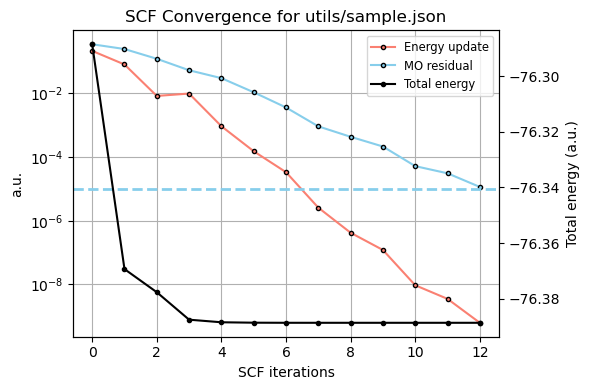

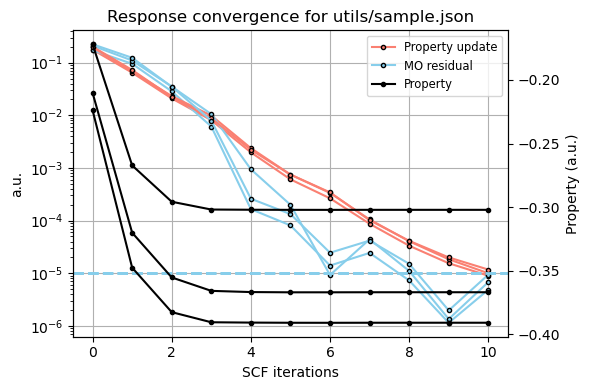

In [4]:
# Example usage
calc = MRChemOutput('utils/sample.json')
if calc.normalTermination():
    print(f'Total Energy          : {calc.getFinalSCFEnergy()}')
    print(f'Walltime (scf, rsp)   : {calc.getWalltime()}')
    print(f'Number of cores       : {calc.ns.output.provenance.total_cores}')
    print('')
    for atom in calc.getNMRShieldingTensors().keys():
        print('-----------------')
        print(f'Data for {atom}')
        print('-----------------')
        print(f'NMR Shielding Constant Tensor:')
        print(calc.getNMRShieldingTensors()[atom])
        print()
        print('Diagonalized tensor:')
        print(calc.getNMRShieldingTensorsDiagonalized()[atom])
        print()
        print(f'Isotropic average: {calc.getNMRShieldingIsotropicAverage()[atom]}')
        print(f'Anisotropy: {calc.getNMRShieldingAnisotropy()[atom]}')
    
    calc.plotSCFConvergence()
    calc.plotResponseConvergence()